# Exam R
Teun Graat, 1273840
# Introduction

The exam consists of 2 parts. In the first part, you have to run a regression, test if the assumptions of a linear regression model are met, and make 2 graphs.

In the second part of the exam, you will have to make a map of Catholic and Protestant schools in the Netherlands.

# Packages


In [73]:
library(tidyverse)
library(gvlma)
install.packages("devtools")
library(devtools)
install_github("easyGgplot2", "kassambara")
library(easyGgplot2)

Warning message:
"package 'devtools' is in use and will not be installed"Warning message:
"Username parameter is deprecated. Please use kassambara/easyGgplot2"Skipping install of 'easyGgplot2' from a github remote, the SHA1 (cb017c1c) has not changed since last install.
  Use `force = TRUE` to force installation


# Assignment 1


## Data

The data are given:


In [13]:
set.seed(123)
df1 <- as.data.frame(matrix(runif(1*50, min = 1, max = 10), ncol = 1)) %>%
    mutate(epsilon = rnorm(50, mean = 0, sd = 2)) %>%
    mutate(response = 3 - 2* V1  + epsilon) %>%
    mutate(group = ifelse(V1 <= 5, 1,2))
df1

V1,epsilon,response,group
3.588198,-3.37338662,-7.5497820,1
8.094746,1.67557409,-11.5139183,2
4.680792,0.30674624,-6.0548384,1
8.947157,-2.27627387,-17.1705871,2
9.464206,2.50762984,-13.4207813,2
1.410008,0.85292844,1.0329115,1
5.752949,-0.59014297,-9.0960418,2
9.031771,1.79025132,-13.2732915,2
5.962915,1.75626698,-7.1695633,2
5.109533,1.64316216,-5.5759031,2


## Asignment 1a

The first assigment is to make boxplot using ggplot with group on the x-axis and V1 on the y-axis.

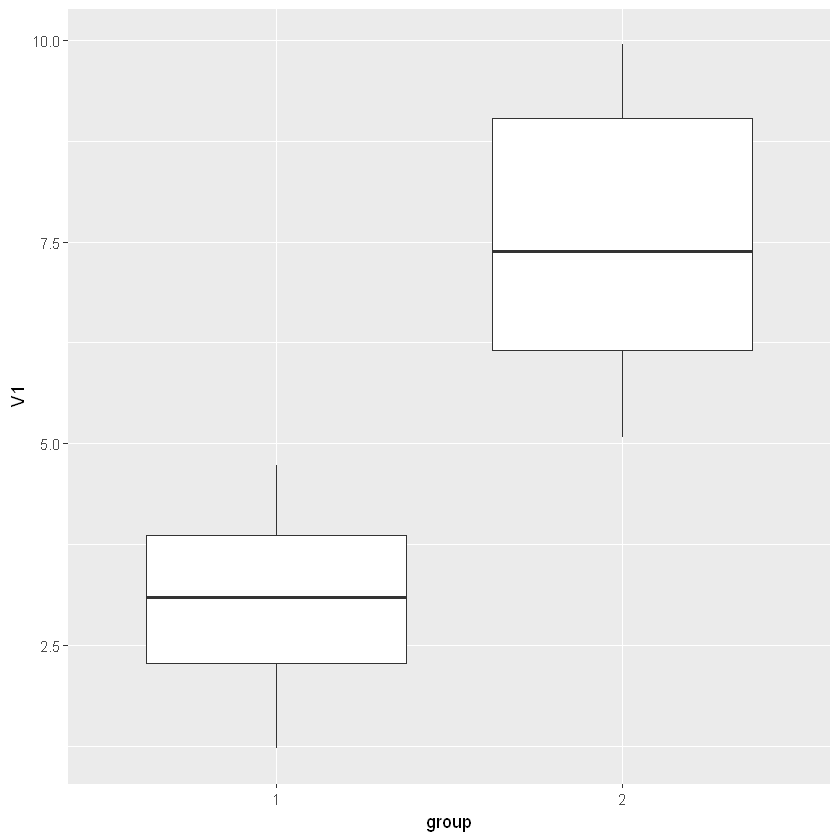

In [39]:
plot1 <- ggplot(data=df1, aes(x = factor(group) , y = V1)) +  
                geom_boxplot()+
plot1
#factor(group), because we get a warning otherwise

## Assignment 1b

Run a regression with response variable as a function of V1.
Show the summary statistics of the regression.


In [14]:
reg1 <- lm(data=df1, V1 ~ response)
summary(reg1)


Call:
lm(formula = V1 ~ response, data = df1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.38273 -0.50585 -0.04045  0.68125  1.80675 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.88469    0.23964   7.865 3.53e-10 ***
response    -0.46018    0.02437 -18.880  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9219 on 48 degrees of freedom
Multiple R-squared:  0.8813,	Adjusted R-squared:  0.8788 
F-statistic: 356.4 on 1 and 48 DF,  p-value: < 2.2e-16


check if the assumptions of linear regression are met with the `gvlma()` function.

In [15]:
gvlma(reg1) #Assumptions are acceptable


Call:
lm(formula = V1 ~ response, data = df1)

Coefficients:
(Intercept)     response  
     1.8847      -0.4602  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = reg1) 

                     Value p-value                Decision
Global Stat        0.58710  0.9645 Assumptions acceptable.
Skewness           0.14850  0.7000 Assumptions acceptable.
Kurtosis           0.05172  0.8201 Assumptions acceptable.
Link Function      0.24979  0.6172 Assumptions acceptable.
Heteroscedasticity 0.13710  0.7112 Assumptions acceptable.

## Assignment 1c

Make a scatterplot with: 
* V1 on the x-axis and the response on the y-axis
* Include the regression line in red with confidence interval 
* In a classic theme
* The x-axis should be labeled "Predictor", the y-axis should be labeled ("Response")



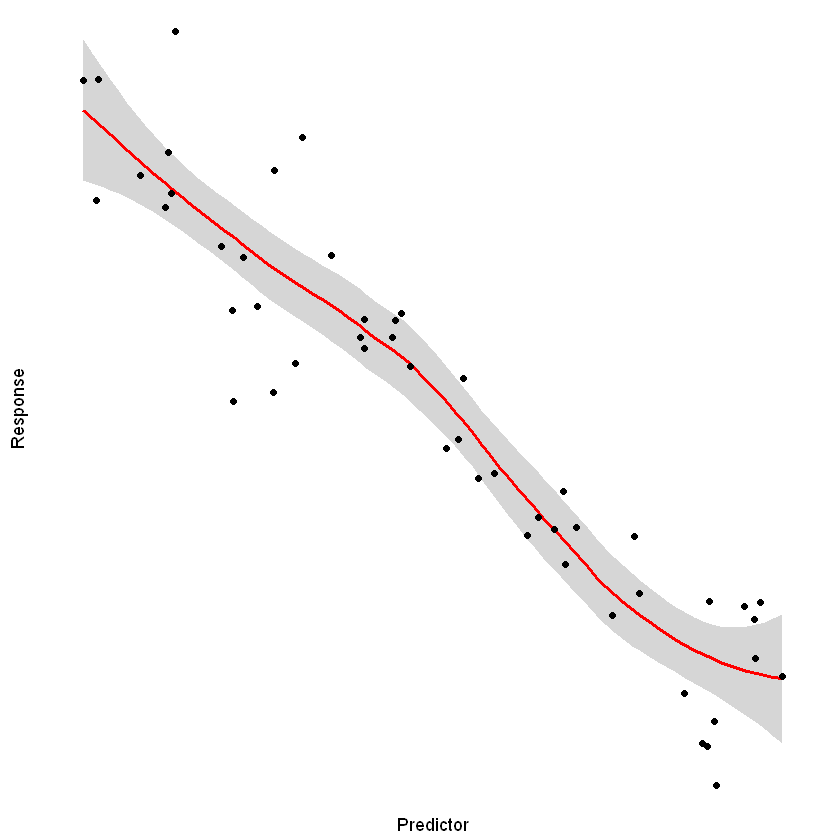

In [95]:
ggplot(data=df1, aes(x=V1, y=response))+
        geom_smooth(color="red",method='loess')+
        geom_point()+
        theme_classic()+
        scale_x_discrete(name="Predictor")+
        scale_y_discrete(name="Response")


# Assigment 2

# Packages

In [71]:
library(thematicmaps)
library(tidyverse)

## Assignment 2a

First you have to read in the file "nld_municipal_map.csv".
Hint: Look at the notebook of week 6 about maps.

In [32]:
map_municipal <- read.csv2("../Eindopdracht/Data/nld_municipal_map.csv", stringsAsFactors = FALSE, dec = ".")
head(map_municipal)

name,id,x,y,order,hole,piece,group
Appingedam,0,251260.5,594393.8,1,FALSE,1,0.1
Appingedam,0,251427.8,594486.7,2,FALSE,1,0.1
Appingedam,0,251668.8,594646.8,3,FALSE,1,0.1
Appingedam,0,251713.5,594770.9,4,FALSE,1,0.1
Appingedam,0,251354.6,595461.4,5,FALSE,1,0.1
Appingedam,0,251310.3,596022.5,6,FALSE,1,0.1


## Assignment 2b

Now you can make an empty map of the Netherlands.

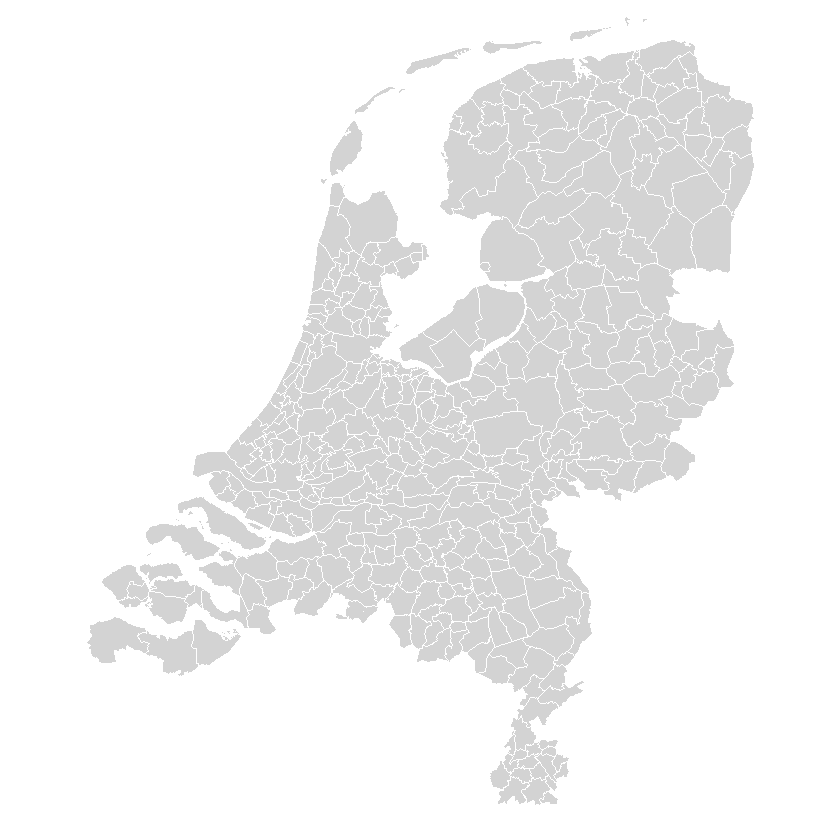

In [53]:
AddMapLayer(MapPlot(), map_municipal)


## Assignment 2c

Read in the pc4 locations (nld_pc4_locations.csv).

Hint: Don't forget the X and Y should be numeric variables!

In [ ]:
pc4_locations <- read.csv2("../Eindopdracht/Data/nld_pc4_locations.csv") %>%
  mutate(X = as.numeric(as.character(X))) %>%
   mutate(Y = as.numeric(as.character(Y)))

str(pc4_locations)

## Assignment 2d

### 2di

Read in the school data


In [49]:
schools <- read.csv2("../Eindopdracht/Data/schools.csv")
head(schools)

PROVINCIE,BEVOEGD.GEZAG.NUMMER,BRIN.NUMMER,VESTIGINGSNUMMER,VESTIGINGSNAAM,STRAATNAAM,HUISNUMMER.TOEVOEGING,POSTCODE,PLAATSNAAM,GEMEENTENUMMER,...,RPA.GEBIED.CODE,RPA.GEBIED.NAAM,WGR.GEBIED.CODE,WGR.GEBIED.NAAM,COROPGEBIED.CODE,COROPGEBIED.NAAM,ONDERWIJSGEBIED.CODE,ONDERWIJSGEBIED.NAAM,RMC.REGIO.CODE,RMC.REGIO.NAAM
,41152,23HC,23HC04,RSG Lingecollege,,,,,NA,...,NA,,NA,,NA,,NA,,NA,
Drenthe,10053,18BR,18BR00,School voor Praktijkonderwijs Assen,Zwartwatersweg,202,9406 NN,ASSEN,106,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
Drenthe,10053,18BR,18BR01,School voor Praktijkonderwijs Assen,Bosrand,2,9401 SL,ASSEN,106,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
Drenthe,13273,20LO,20LO00,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Mr Groen v Prinstererln,98,9402 KG,ASSEN,106,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
Drenthe,13273,20LO,20LO01,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Schoolstraat,1,9331 AV,NORG,1699,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,1,Groningen en omstreken,7,Noord- en Midden Drenthe
Drenthe,13273,20LO,20LO02,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Esdoornlaan,2,9411 AV,BEILEN,1731,...,5,Zuid- en Midden-Drenthe,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe


### 2dii

First, create a new dataframe schools1, which is equal to schools.

As you see POSTCODE has a structure of (1234 AB). You should create a new variable PC4 that is equal to the first 4 numbers in POSTCODE

Hint: Use the function `substr()`

Then select the variables PC4 and DENOMINATIE

In [97]:
schools1 <- schools %>%
        mutate(PC4 = substr(POSTCODE, 1, 4))
schools1 <- schools1[c('DENOMINATIE', 'PC4')]

In [103]:
head(schools1)

DENOMINATIE,PC4
Openbaar,
Openbaar,9406
Openbaar,9401
Openbaar,9402
Openbaar,9331
Openbaar,9411


### 2diii

Create the dataframe school_loc as a join from pc4_locations and school1 that combines the columns from both data frames, but only keeps rows where the value in the pc4_locations column matches in both data frames.
And then select the observations with DENOMINATIE is equal to "Rooms-Katholiek" or "Protestants-Christelijk"

In [101]:
school_loc <- merge(pc4_locations, schools1, by='PC4', all = FALSE)
school_loc <- subset(school_loc, DENOMINATIE == "Rooms-Katholiek" | DENOMINATIE == "Protestants-Christelijk")
head(school_loc)

,PC4,X,Y,DENOMINATIE
31,1065,116701.2,485645.8,Protestants-Christelijk
37,1071,120223.0,485571.3,Rooms-Katholiek
50,1077,120152.7,484262.8,Protestants-Christelijk
53,1077,120152.7,484262.8,Rooms-Katholiek
57,1081,118277.6,482449.5,Protestants-Christelijk
80,1132,132947.2,501873.0,Rooms-Katholiek


## Assignment 2e

Create a map of Catholic and Protestant schools in the Netherlands


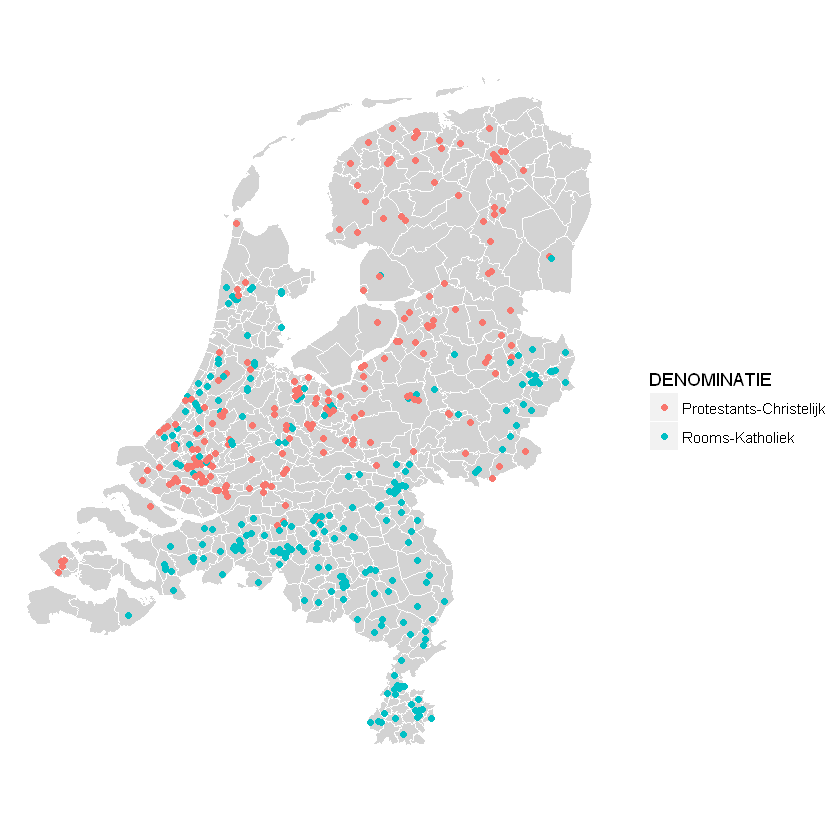

In [108]:
AddMapLayer(MapPlot(), map_municipal) %>%
AddPointsLayer(school_loc, columnNameColor="DENOMINATIE")

End of notebook